In [2]:
##Unfair Casino##

In [3]:
import numpy as np
import scipy
import random
import matplotlib.pyplot as plt
import copy
%matplotlib inline

In [4]:
#Имеем 2 матрицы 
A = scipy.array([[0.95,0.05],[0.1,0.9]])
E = scipy.array([[1/6,1/6,1/6,1/6,1/6,1/6],[1/10,1/10,1/10,1/10,1/10,1/2]])#верояности для правильной и неправильной

In [5]:
print(A)
print(E)

[[ 0.95  0.05]
 [ 0.1   0.9 ]]
[[ 0.16666667  0.16666667  0.16666667  0.16666667  0.16666667  0.16666667]
 [ 0.1         0.1         0.1         0.1         0.1         0.5       ]]


In [6]:
n = len(A)# Найдем стационарное распределение 
def stationary_distribution(A):
    n = len(A)
    M1 = np.vstack(((A.transpose() - np.eye(n))[:-1],np.ones(n)))
    v1 = np.eye(n)[-1]
    p = np.linalg.solve(M1,v1)
    return p

In [7]:
s=stationary_distribution(A)

In [8]:
#функция создания вектора наблюдения x и вектора состояний y
#0-нечестный кубик, 1-честный кубик
#x[i] какое число выпало на кубике
n=200 #длина последовательности
x=np.zeros(n, dtype = 'int')
y=np.zeros(n, dtype = 'int')
k=random.random()

if k < s[0]: 
    y[0]=0
    t=random.randint(1,6)
    x[0]=t
elif k >= s[0]:
    y[0]=1
    r=random.randint(1,10)
    if r<6:
        x[0]=r
    else: 
        x[0]=6 #Нашли первые элементы

In [9]:
i=1 #найдем остальные элементы векторов 
while i < n:
    if y[i-1]==0:
        r1=random.randint(1,20)
        if r1<19:
            y[i]=0
        elif r1==20:
            y[i]=1
    elif y[i-1]==1:        
        t=random.randint(1,10) 
        if t==1:
            y[i]=0
        elif t >= 2:
            y[i]=1
    if y[i]==0:
        t1=random.randint(1,6)
        x[i]=t1
        
    elif y[i]==1:
        r2=random.randint(1,10)
        if r2<6:
            x[i]=r2
        else: 
            x[i]=6    
    i=i+1

In [10]:
print('Наблюдения:',*x, '\n')
print('Состояния:', *y) #0-неправильная, 1-правильная
#получили первый:вектор наблюдения, второй: вектор состояния

Наблюдения: 1 4 3 3 3 5 2 6 6 6 5 4 6 5 4 3 6 4 3 4 5 4 5 6 3 3 4 5 5 6 6 6 4 3 1 3 4 1 1 6 6 1 3 5 5 5 6 6 4 6 6 5 3 6 6 5 6 6 3 6 6 2 6 6 2 6 3 2 3 4 1 3 5 3 6 1 5 6 5 5 1 3 1 6 5 3 5 3 4 6 5 5 1 4 2 6 5 4 4 1 6 4 1 2 3 6 4 2 4 6 6 3 6 4 6 6 1 2 2 3 2 4 2 5 1 5 2 4 6 2 4 4 5 5 5 6 3 6 6 3 2 2 3 4 1 3 1 4 6 2 3 4 5 3 4 6 4 5 6 6 1 6 6 4 6 1 3 6 2 3 6 5 2 3 4 2 5 4 3 5 5 6 6 6 1 6 4 2 6 2 5 2 1 3 6 5 1 1 3 1 

Состояния: 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0


In [11]:
#Алгоритм Витерби
#Найдем наиболее вероятную последовательность состояний при данной последовательности наблюдения(х)
n=200
V=np.zeros((2, n))
P=np.zeros((2, n))

In [12]:
def Viterby(x, A, E):
    n = len(x)
    V=np.zeros((2, n))
    P=np.zeros((2, n), dtype = 'int')
    V[:, 0] = s*E[:, x[0] - 1]
    n = len(x)
    m = np.zeros(n)
    m[0] = np.max(V[:, 0])
    V[:, 0] /= m[0]
    for i_1 in range(1, n):
        for j_1 in range(2):
            S = E[j_1, x[i_1]-1]*V[:, i_1-1]*A[:, j_1]
            #S = E[j, x[i_1-1]]*V[:, i_1-1]*A[:, j_1]
            V[j_1,i_1] = np.max(S)
            P[j_1,i_1] = np.argmax(S)
    p0 = np.zeros(n, dtype = int)
    p0[-1] = np.argmax(V[:,-1])
    for i_1 in range(n-2,-1,-1):
        p0[i_1] = P[int(p0[i_1+1]),i_1+1]
    return p0

In [13]:
V_b = Viterby(x, A, E)

In [14]:
print('Состояния, согласно алгоритму Viterby:',*V_b, sep=" ")

Состояния, согласно алгоритму Viterby: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


In [15]:
def P_Viterby(y, p0):
    n = len(y)
    s = 0
    for i in range(n):
        if y[i] == p0[i]:
            s+=1
    return round(s/n,2)


In [16]:
P_V = np.zeros(n)
for t in range(n):
    P_V[t] = P_Viterby(y, V_b)
#P_V
e0=sum(P_V)/n
print('Вероятность сопадений состояний:', e0)

Вероятность сопадений состояний: 0.81


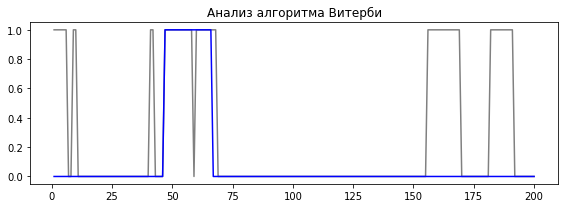

In [17]:
rng = np.arange(200)
yrs = 1 + rng
fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(yrs,y, "-", color = 'grey')
ax.plot(yrs,V_b, color = 'blue')
ax.set_title('Анализ алгоритма Витерби')
fig.tight_layout() 
plt.show()

In [18]:
#Алгоритм Форвард 
#найдем вероятность попадания в y[i] зная x[0],..,x[i]
V1=np.zeros((2, n))
V1[0,0]=s[0]*E[0, x[0]-1]
V1[1,0]=s[1]*E[1, x[0]-1]
#добавляем нормировку 
norm=np.zeros(n)
norm[0]=max([s[0]*E[0,x[0]-1],s[1]*E[1,x[0]-1]])
V1[0,0]/=norm[0]
V1[1,0]/=norm[0]

In [19]:
for j in range(1,len(x)):
    s1 = np.array([A[0,0]*V1[0,j-1],A[1,0]*V1[1,j-1]])
    s2 = np.array([A[0,1]*V1[0,j-1],A[1,1]*V1[1,j-1]])
    V1[0,j]=E[0,x[j]-1]*np.sum(s1)
    V1[1,j]=E[1,x[j]-1]*np.sum(s2)
    norm[j]=max(V1[0,j],V1[1,j])
    V1[0,j]/=norm[j]
    V1[1,j]/=norm[j]
p1 = V1[0,n-1]+V1[1,n-1]

In [20]:
#Алгоритм обратного хода
V2=np.zeros((2, n))
norm1=np.zeros(n)
norm1[n-1]=1
V2[0,n-1]=1
V2[1,n-1]=1

In [21]:
for u in range(n-2,-1,-1):
    sr = np.array([A[0,0]*V2[0,u+1]*E[0,x[u+1]-1], A[0,1]*V2[1,u+1]*E[1,x[u+1]-1]])
    st = np.array([A[1,0]*V2[0,u+1]*E[0,x[u+1]-1], A[1,1]*V2[1,u+1]*E[1,x[u+1]-1]])
    V2[0,u] = np.sum(sr)
    V2[1,u] = np.sum(st)
    norm1[u] = max(V2[0,u],V2[1,u])
    V2[0,u] /= norm1[u]
    V2[1,u] /= norm1[u]
p2=s[0]*V2[0,0]*E[0,x[0]-1]+s[1]*V2[1,0]*E[1,x[0]-1]

In [22]:
print('Логарифм вероятности наблодения для алгоритма Forward', np.log(p1)+np.sum(np.log(norm)))
print('Логарифм вероятности наблодения для алгоритма Backward', np.log(p2)+np.sum(np.log(norm1)))
print('Вероятности равны')

Логарифм вероятности наблодения для алгоритма Forward -350.654309524
Логарифм вероятности наблодения для алгоритма Backward -350.654309524
Вероятности равны


In [23]:
#Апостериорное дешифрование
pr=np.zeros(n)
for k in range(n):
    pr[k]=np.exp(np.log(V1[0,k]) + np.sum(np.log(norm[:k+1])) + np.log(V2[0,k]) - np.log(p2) - np.sum(np.log(norm1[:k])))

In [24]:
print('Вероятности выпадания верной кости на кажлом шаге', pr)

Вероятности выпадания верной кости на кажлом шаге [ 0.90133657  0.91631039  0.91634535  0.90145379  0.86637696  0.79872793
  0.67461728  0.45021694  0.38623642  0.40433094  0.52665741  0.58354192
  0.59507249  0.71173115  0.77070691  0.79282633  0.78590059  0.86227541
  0.90292562  0.92220631  0.92692622  0.91875212  0.89479742  0.84660283
  0.86844606  0.86858381  0.84706474  0.79628965  0.69832798  0.5185858
  0.47526778  0.51533055  0.6878314   0.78102391  0.82781783  0.84473785
  0.83775905  0.80441696  0.73293724  0.59807774  0.57685068  0.64326334
  0.66445849  0.64792093  0.58781064  0.46290042  0.22907984  0.15328322
  0.14269687  0.08805318  0.0800349   0.10882356  0.10041549  0.05184148
  0.03994196  0.05014585  0.03036526  0.02995955  0.04843194  0.03726697
  0.04706208  0.08981146  0.09454261  0.14575583  0.3061622   0.38473134
  0.64058074  0.78242925  0.86036887  0.90192299  0.92176592  0.92690492
  0.91915478  0.89577863  0.84852148  0.87090094  0.87179209  0.85150961
  

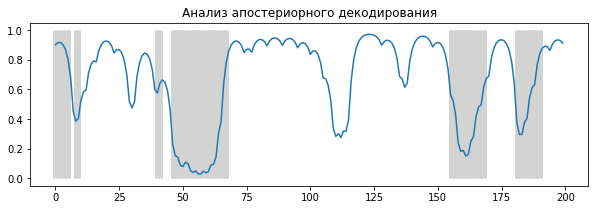

In [25]:
fig, ax = plt.subplots(figsize=(8, 3))
xp = np.arange(n)
for i in range(n):
    if y[i]==1:
        ax.vlines(i,0,1,linewidth = 1000/n, color = 'lightgrey' )
ax.plot(xp, pr)
ax.set_title('Анализ апостериорного декодирования')
plt.style.use('fast')
fig.set_figwidth(10)
plt.show()